# ECSE415 - Into to Computer Vision
## Assignment 3
### Alexander Harris - 260688155

## 1 - Segmentation
### 1.2 - Normalized graph-cut and Mean-Shift segmentation

In [1]:
import cv2
import numpy as np
import time
import math
from skimage import segmentation, color, data
from skimage.future import graph
from matplotlib import pyplot as plt

img = cv2.cvtColor(cv2.imread('./home.jpg'), cv2.COLOR_BGR2RGB)

In [2]:
def plotFigures(images):
    """
    Plots images from list in grid.
    
    images: list of images
    title: title for each subplot
    params: specific arguments to add to title
    """
    grid_len = math.ceil(math.sqrt(len(images)))
    
    plt.figure(figsize=(30, 30))
    for i, image in enumerate(images):
        params_str = image['params']
        title = image['title']
        plt.subplot(grid_len, grid_len, i+1), plt.imshow(image['image'])
        plt.title('{} - {}'.format(title, params_str)), plt.axis('off')
    plt.show()

### Normalized Graph-Cut Segmentation:

In [3]:
def normCut(img, compactness=10.0, n_segments=100, thresh=0.001):
    """
    Image segmentation using normalized graph-cuts.
    
    compactness: balance between color and space proximity
    n_segments: number of labels in segmented image
    thresh: threshold value
    """
    start = time.time()
    labels = segmentation.slic(img, compactness=compactness, n_segments=n_segments)
    rag = graph.rag_mean_color(img, labels, mode='similarity')
    labels = graph.cut_normalized(labels, rag, thresh=thresh)
    out = color.label2rgb(labels, img, kind='avg')
    run = round(time.time() - start, 2)

    return {'image': out, 'title': 'Normalized Cut', 'params': 'comp={}, n_segments={}, thresh={}, run={}s'.format(compactness, n_segments, thresh, run)}

#### Compactness:

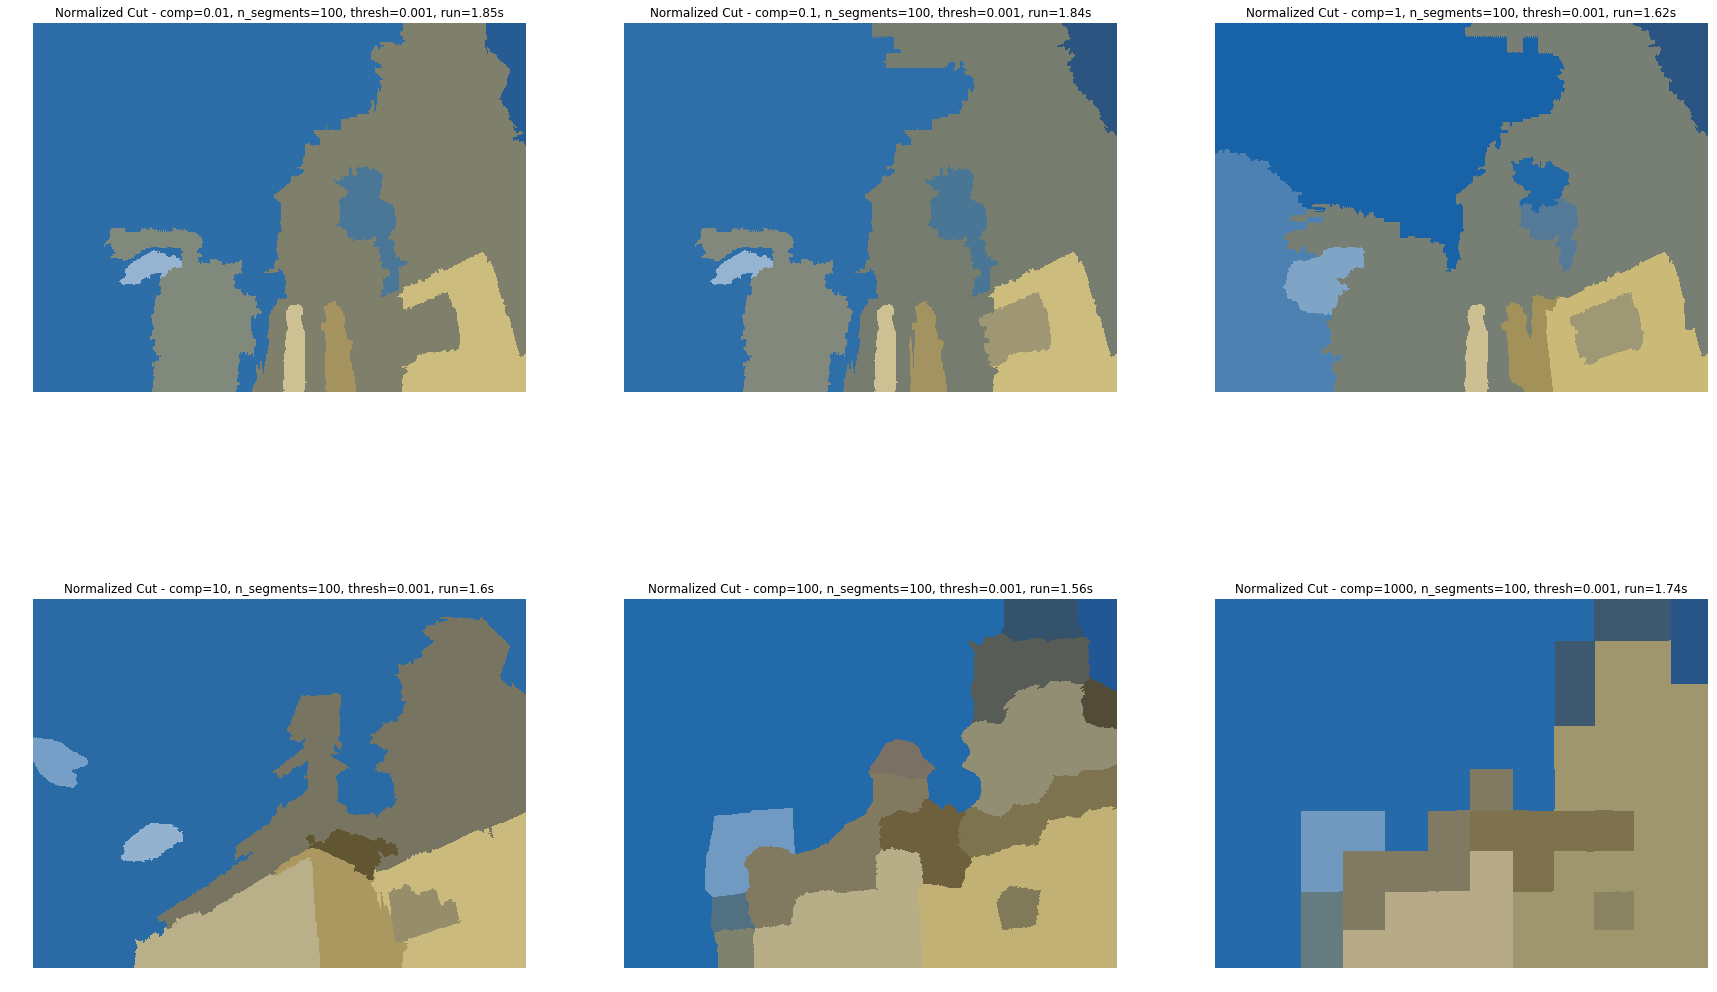

In [4]:
images = []
images.append(normCut(img, compactness=0.01))
images.append(normCut(img, compactness=0.1))
images.append(normCut(img, compactness=1))
images.append(normCut(img, compactness=10))
images.append(normCut(img, compactness=100))
images.append(normCut(img, compactness=1000))
plotFigures(images)

Increasing compactness appears to make the shape of the segments trend towards a square, all while having little effect on overall runtime.

#### Number of segments:

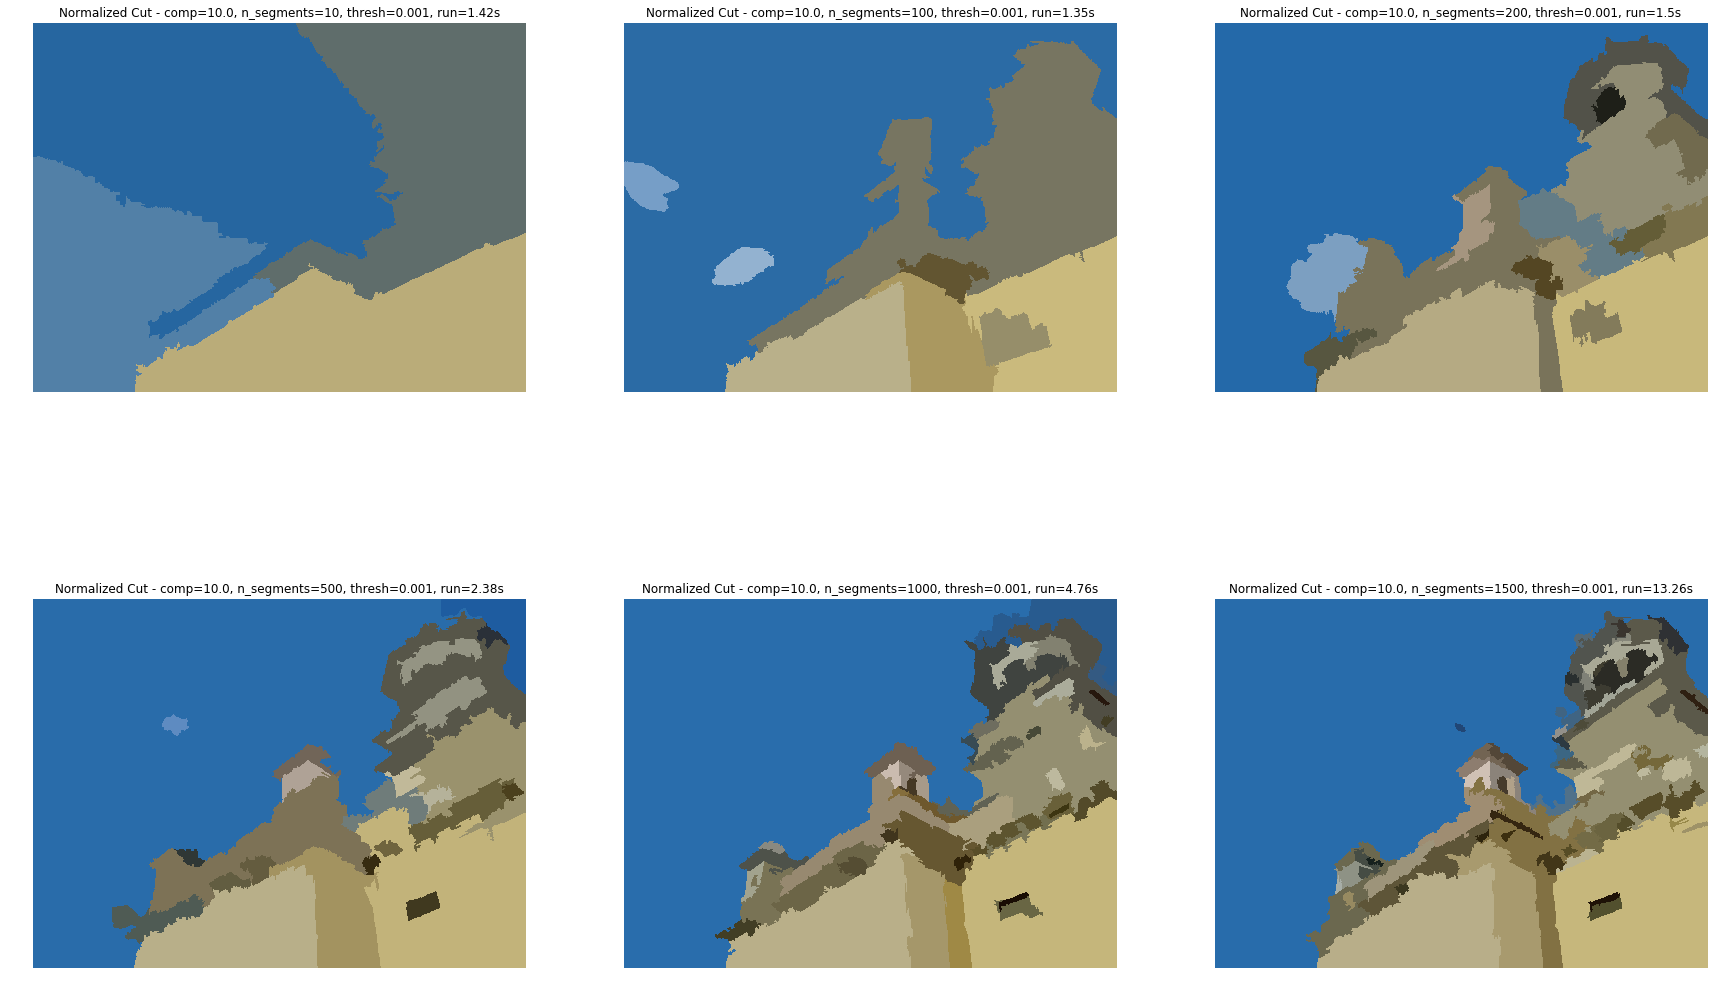

In [11]:
images = []
images.append(normCut(img, n_segments=10))
images.append(normCut(img, n_segments=100))
images.append(normCut(img, n_segments=200))
images.append(normCut(img, n_segments=500))
images.append(normCut(img, n_segments=1000))
images.append(normCut(img, n_segments=1500))
plotFigures(images)

Increasing the number of segments simply increases the overall precision/resolution of the segmentation in the resulting image. This however does have a significant effect on runtime past approx. 400 segments.

#### Threshold:

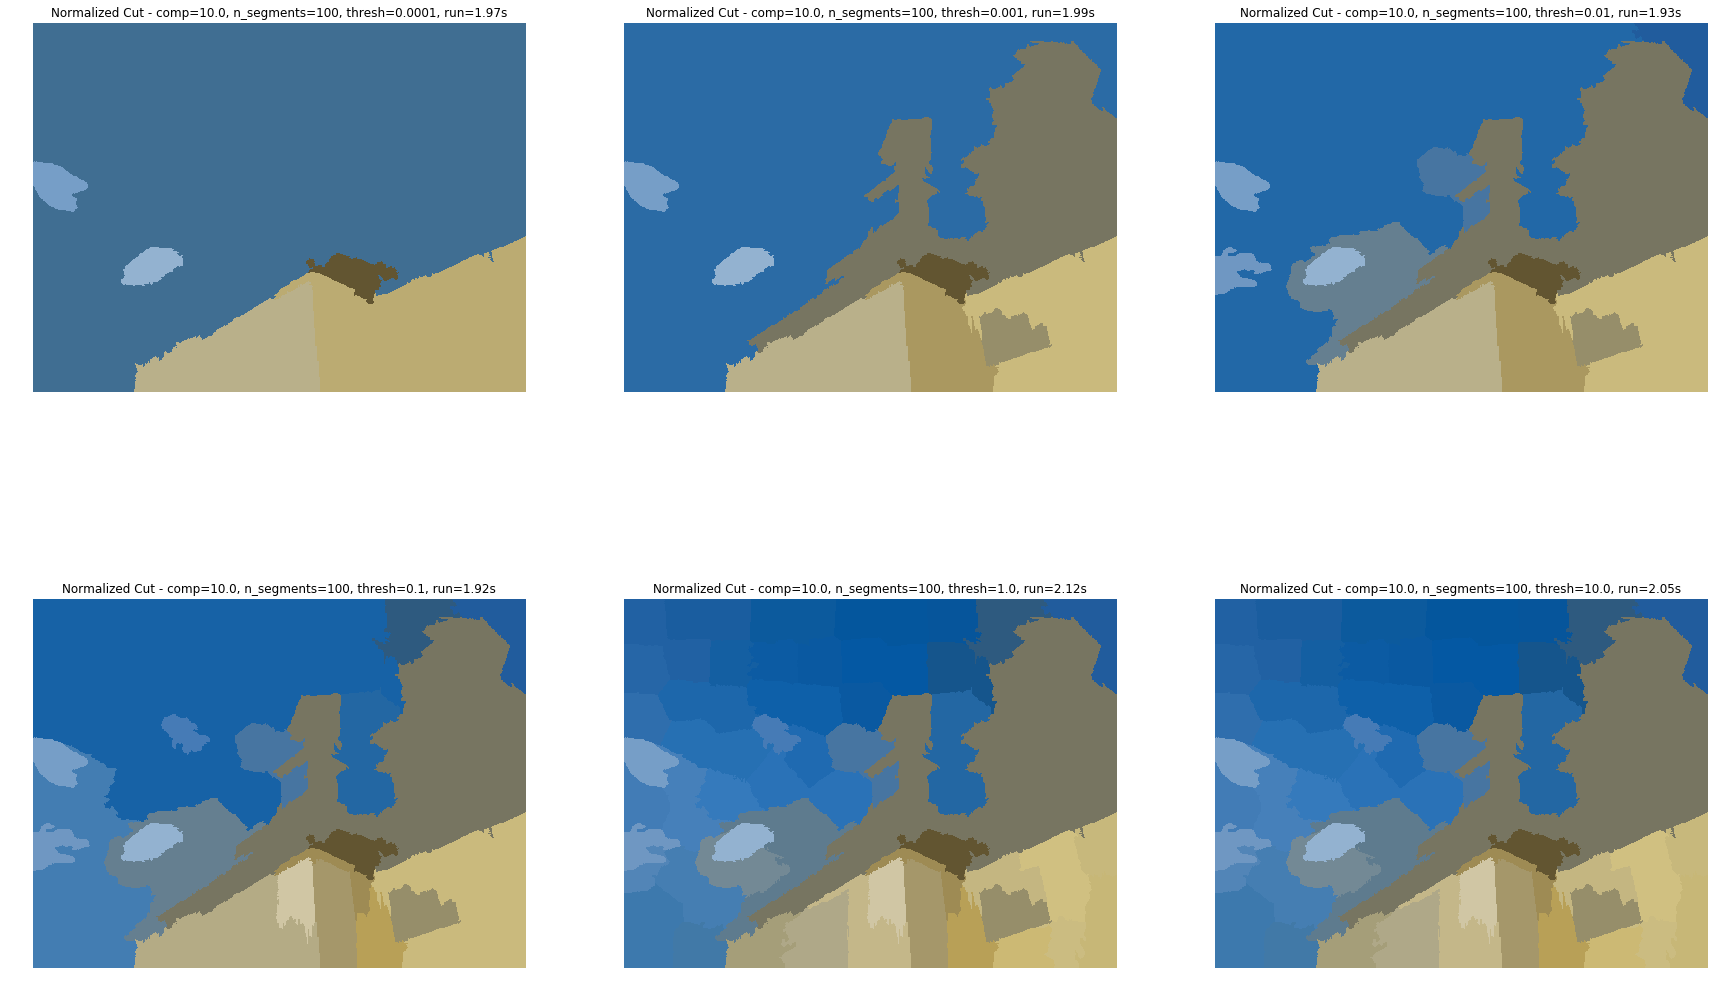

In [6]:
images = []
images.append(normCut(img, thresh=0.0001))
images.append(normCut(img, thresh=0.001))
images.append(normCut(img, thresh=0.01))
images.append(normCut(img, thresh=0.1))
images.append(normCut(img, thresh=1.0))
images.append(normCut(img, thresh=10.0))
plotFigures(images)

Increasing the threshold appears to increase the number of graph subdivisions in the segmentation. This does not appear to have a significant effect on runtime for the range tested.

### Mean-Shift Segmentation:

In [7]:
def meanShift(img, ratio=1.0, kernel_size=5, max_dist=10):
    """
    Mean Shift segmentation using the quickshift algorithm.
    
    ratio: balance of color-space proximity and image-space proximity
    kernel_size: width of Gaussian kernel used in smoothing
    max_dist: cut-off point for data distances
    """
    start = time.time()
    labels = segmentation.quickshift(img, ratio=ratio, kernel_size=kernel_size, max_dist=max_dist)
    out = color.label2rgb(labels, img, kind='avg')
    run = round(time.time() - start, 2)

    return {'image': out, 'title': 'Mean Shift', 'params': 'ratio={}, kernel_size={}, max_dist={}, run={}s'.format(ratio, kernel_size, max_dist, run)}

#### Ratio:

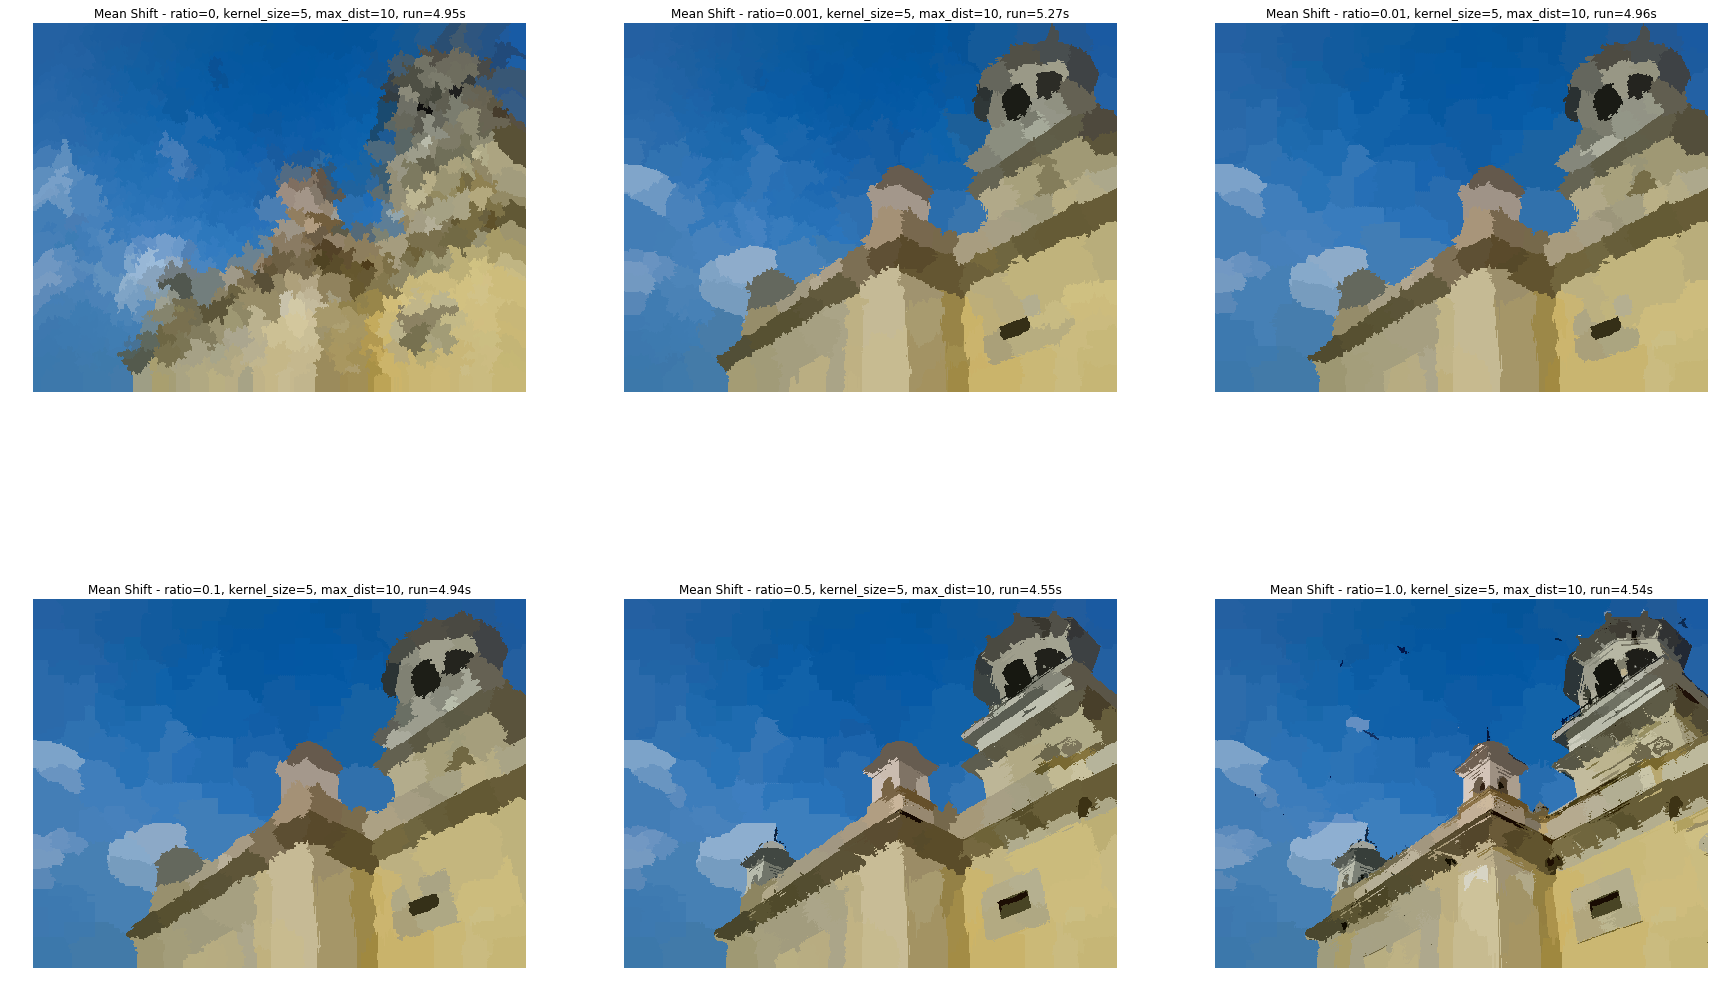

In [8]:
images = []
images.append(meanShift(img, ratio=0))
images.append(meanShift(img, ratio=0.001))
images.append(meanShift(img, ratio=0.01))
images.append(meanShift(img, ratio=0.1))
images.append(meanShift(img, ratio=0.5))
images.append(meanShift(img, ratio=1.0))
plotFigures(images)

The ratio appears to affect the precision of the segmentation, with values closer to 0 resulting in less well-defined boundaries for the individual clusters. Does not seem to have a significant effect on runtime.

#### Kernel Size:

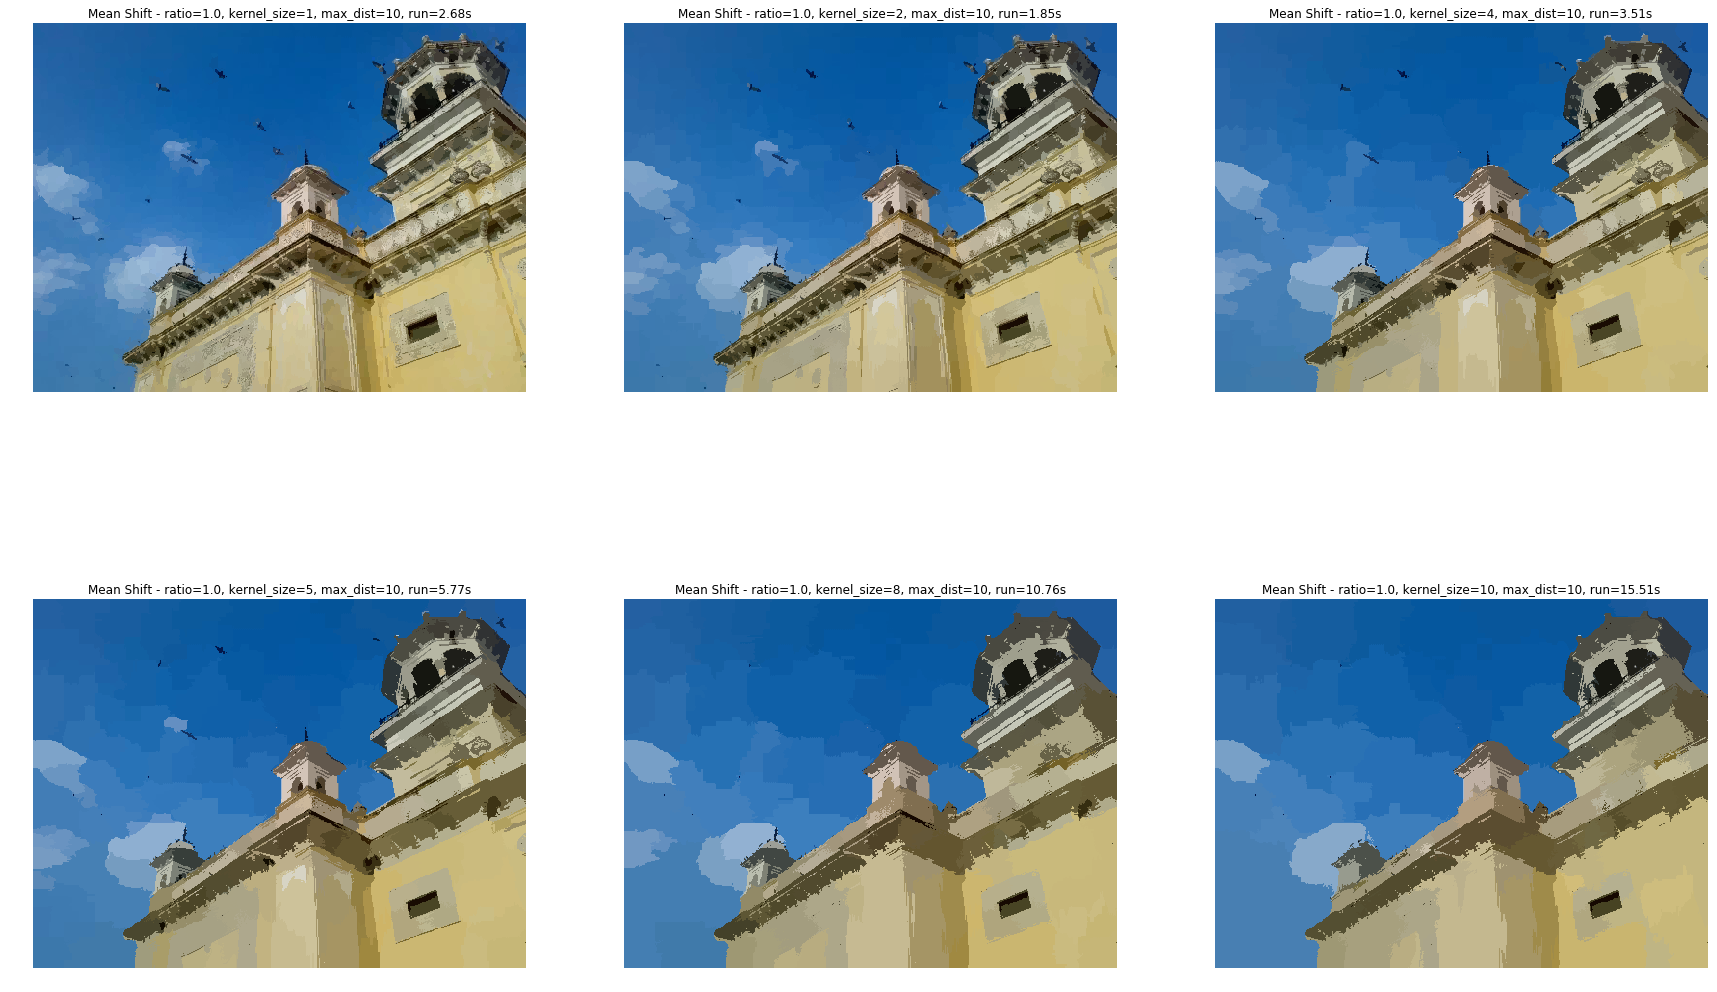

In [9]:
images = []
images.append(meanShift(img, kernel_size=1))
images.append(meanShift(img, kernel_size=2))
images.append(meanShift(img, kernel_size=4))
images.append(meanShift(img, kernel_size=5))
images.append(meanShift(img, kernel_size=8))
images.append(meanShift(img, kernel_size=10))
plotFigures(images)

Higher Gaussian kernel sizes result in a larger smoothing effect and so fewer total clusters in the segmented image. Larger sizes result in longer runtimes.

#### Max Distance:

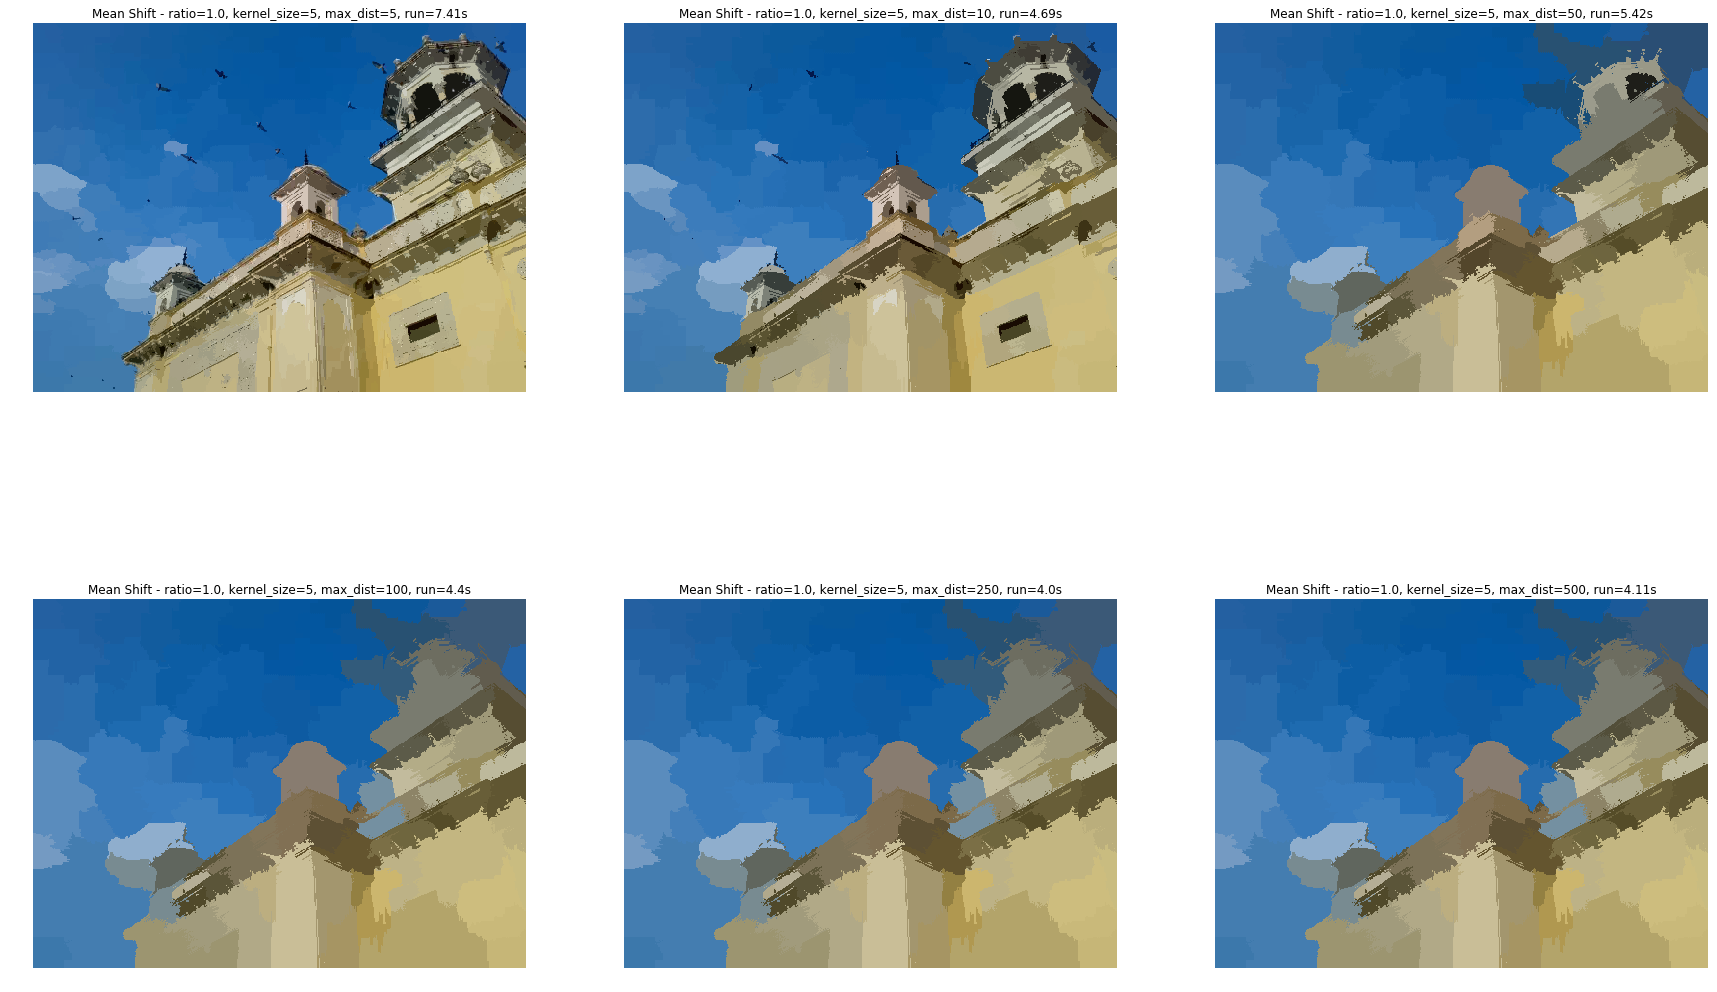

In [10]:
images = []
images.append(meanShift(img, max_dist=5))
images.append(meanShift(img, max_dist=10))
images.append(meanShift(img, max_dist=50))
images.append(meanShift(img, max_dist=100))
images.append(meanShift(img, max_dist=250))
images.append(meanShift(img, max_dist=500))
plotFigures(images)

Max distance is the cut-off for distance from individual cluster centers. Therefore, higher values will result in fewer total clusters in the final image. Smaller values will increase runtime as there are more clusters to compute.